In [404]:
# Setting Up Dependencies
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time
import gmaps
from config import api_key
from config import w_key
import numpy as np
from scipy.stats import linregress

gkey = api_key
gmaps.configure(api_key=gkey)

In [216]:
# Generating random Brewery IDs

brewery_id = []

for x in range(500):
    brewery_id.append(np.random.randint(0, 8029))

    brewery_id

unique_brewery = pd.DataFrame({"ID" : brewery_id})

unique_id = list(unique_brewery["ID"].unique())

print(f"Generated {len(unique_id)} unique Brewery IDs.")

Generated 469 unique Brewery IDs.


In [217]:
# Retrieving Raw Brewery Data
raw_brewery_data = []
start = time.time()
for x in range(len(unique_id)):
    try:
        url = "https://api.openbrewerydb.org/breweries/" + str(unique_id[x])
        response = requests.get(url).json()
        raw_brewery_data.append(response)
        print(f"({x+1}/{len(unique_id)}) Retrieved Brewery ID {unique_id[x]}...")

    except:
        print(f"({x+1}/{len(unique_id)}) Timeout for Brewery ID {unique_id[x]}... skipping")
        
stop = time.time()
time_elapsed = round((stop - start)/60,2)
print(f"\nRetrieved {len(unique_id)} breweries... Time elapsed: {time_elapsed} minutes.")

(1/469) Retrieved Brewery ID 96...
(2/469) Retrieved Brewery ID 964...
(3/469) Retrieved Brewery ID 5462...
(4/469) Retrieved Brewery ID 5227...
(5/469) Retrieved Brewery ID 4818...
(6/469) Retrieved Brewery ID 975...
(7/469) Retrieved Brewery ID 2594...
(8/469) Retrieved Brewery ID 5902...
(9/469) Retrieved Brewery ID 3104...
(10/469) Retrieved Brewery ID 4805...
(11/469) Retrieved Brewery ID 3165...
(12/469) Retrieved Brewery ID 3004...
(13/469) Retrieved Brewery ID 3561...
(14/469) Retrieved Brewery ID 4393...
(15/469) Retrieved Brewery ID 304...
(16/469) Retrieved Brewery ID 4283...
(17/469) Retrieved Brewery ID 3069...
(18/469) Retrieved Brewery ID 5110...
(19/469) Retrieved Brewery ID 5217...
(20/469) Retrieved Brewery ID 3038...
(21/469) Retrieved Brewery ID 4275...
(22/469) Retrieved Brewery ID 677...
(23/469) Retrieved Brewery ID 477...
(24/469) Retrieved Brewery ID 2523...
(25/469) Retrieved Brewery ID 3508...
(26/469) Retrieved Brewery ID 4310...
(27/469) Retrieved Brewery I

(215/469) Retrieved Brewery ID 3836...
(216/469) Retrieved Brewery ID 1715...
(217/469) Retrieved Brewery ID 5446...
(218/469) Retrieved Brewery ID 4436...
(219/469) Retrieved Brewery ID 2925...
(220/469) Retrieved Brewery ID 4467...
(221/469) Retrieved Brewery ID 1202...
(222/469) Retrieved Brewery ID 5173...
(223/469) Retrieved Brewery ID 1265...
(224/469) Retrieved Brewery ID 5303...
(225/469) Retrieved Brewery ID 4280...
(226/469) Retrieved Brewery ID 2431...
(227/469) Retrieved Brewery ID 1165...
(228/469) Retrieved Brewery ID 3280...
(229/469) Retrieved Brewery ID 1846...
(230/469) Retrieved Brewery ID 4166...
(231/469) Retrieved Brewery ID 2709...
(232/469) Retrieved Brewery ID 4829...
(233/469) Retrieved Brewery ID 5406...
(234/469) Retrieved Brewery ID 5923...
(235/469) Retrieved Brewery ID 937...
(236/469) Retrieved Brewery ID 2485...
(237/469) Retrieved Brewery ID 744...
(238/469) Retrieved Brewery ID 5949...
(239/469) Retrieved Brewery ID 1616...
(240/469) Retrieved Brewery

(429/469) Retrieved Brewery ID 3482...
(430/469) Retrieved Brewery ID 1208...
(431/469) Retrieved Brewery ID 2603...
(432/469) Retrieved Brewery ID 714...
(433/469) Retrieved Brewery ID 3811...
(434/469) Retrieved Brewery ID 4084...
(435/469) Retrieved Brewery ID 4351...
(436/469) Retrieved Brewery ID 401...
(437/469) Retrieved Brewery ID 5136...
(438/469) Retrieved Brewery ID 1238...
(439/469) Retrieved Brewery ID 5189...
(440/469) Retrieved Brewery ID 1947...
(441/469) Retrieved Brewery ID 916...
(442/469) Retrieved Brewery ID 3689...
(443/469) Retrieved Brewery ID 3426...
(444/469) Retrieved Brewery ID 768...
(445/469) Retrieved Brewery ID 2988...
(446/469) Retrieved Brewery ID 5607...
(447/469) Retrieved Brewery ID 985...
(448/469) Retrieved Brewery ID 2397...
(449/469) Retrieved Brewery ID 3355...
(450/469) Retrieved Brewery ID 2896...
(451/469) Retrieved Brewery ID 2967...
(452/469) Retrieved Brewery ID 257...
(453/469) Retrieved Brewery ID 4861...
(454/469) Retrieved Brewery ID 

In [218]:
# Creating DataFrame
brewery_df = pd.DataFrame(raw_brewery_data)
brewery_df.to_csv("raw_brewery_data.csv")
brewery_df.head()

,brewery_type,city,country,id,latitude,longitude,name,phone,postal_code,state,street,updated_at,website_url
0,micro,Elgin,United States,96,None,None,Arizona Craft Brewing,520369342,85611,Arizona,"473 Elgin Road, Suite BH",2018-08-11T21:35:46.428Z,
1,micro,Carlsbad,United States,964,33.133904,-117.269558,Rouleur Brewing Company,4422445111,92008-8804,California,5840 El Camino Real Ste 101,2018-08-24T00:01:45.520Z,http://www.rouleurbrewing.com
2,brewpub,Columbus,United States,5462,None,None,Hoof Hearted Brewing - Brewery and Kitchen,6144014033,43215-1845,Ohio,850 N 4th St,2018-08-11T21:38:59.473Z,
3,micro,Black Mountain,United States,5227,35.6079376,-82.35826,Pisgah Brewing Co,8286690190,28711-8208,North Carolina,150 Eastside Dr,2018-08-24T15:42:28.512Z,http://www.pisgahbrewing.com
4,micro,Penn Yan,United States,4818,42.6589947605887,-77.0546363495329,Lyonsmith Brewing Company,3155365603,14527-1651,New York,138 Water St,2018-08-24T15:39:41.825Z,http://www.lyonsmithbrewing.com


In [219]:
# Drop rows with "None" Lats/Lngs
brewery_df = brewery_df[brewery_df.latitude.str.contains("None") == False]
print(f"Dropped {len(unique_id) - len(brewery_df)} breweries from DataFrame which did not have coordinates.\nTotal Brewery count: {len(brewery_df)}") 
      

Dropped 196 breweries from DataFrame which did not have coordinates.
Total Brewery count: 273


In [220]:
brewery_loc = brewery_df[['latitude','longitude']].astype(float)
brewery_loc.head()

,latitude,longitude
1,33.133904,-117.269558
3,35.607938,-82.358260
4,42.658995,-77.054636
7,45.888505,-123.962024
8,39.299631,-76.612712


In [221]:
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(brewery_loc, dissipating=False, max_intensity=10, point_radius=1)

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [222]:
#Grabbing list of breweries from brewery_df
brewery_names = brewery_df['name'].tolist()
brewery_cities = brewery_df['city'].tolist()

In [223]:
#Grabbing weather info for cities
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={w_key}&units={units}&q="
temps=[]
x=0
for city in brewery_cities:
    x=x+1
    city_dic = {'name':'','temp':''}
    response = requests.get(query_url + city).json()
    
    if (response['cod'] != "404" and response['cod'] != "500"):      
        city_dic['name'] = response['name']
        city_dic['temp'] = response['main']['temp_max']
        temps.append(city_dic)
        print(f"({x}/{len(brewery_cities)}) {city} weather data found...")
    else:
        print(f"({x}/{len(brewery_cities)}) {city} not found... skipping")
    

(1/273) Carlsbad weather data found...
(2/273) Black Mountain weather data found...
(3/273) Penn Yan weather data found...
(4/273) Cannon Beach weather data found...
(5/273) Baltimore weather data found...
(6/273) Frederick not found... skipping
(7/273) Bridgton weather data found...
(8/273) Ann Arbor weather data found...
(9/273) San Diego weather data found...
(10/273) Carson City weather data found...
(11/273) Bangor weather data found...
(12/273) Brevard weather data found...
(13/273) Evanston weather data found...
(14/273) Pontiac weather data found...
(15/273) Portsmouth weather data found...
(16/273) Panama City weather data found...
(17/273) Ponderay weather data found...
(18/273) Lewiston weather data found...
(19/273) Cincinnati weather data found...
(20/273) Grand Rapids weather data found...
(21/273) Marshall weather data found...
(22/273) Edwardsville weather data found...
(23/273) Brooklyn weather data found...
(24/273) Wichita weather data found...
(25/273) Mason weather

(200/273) Santa Cruz weather data found...
(201/273) Bend weather data found...
(202/273) Chatham weather data found...
(203/273) North Woodstock weather data found...
(204/273) Hawthorne weather data found...
(205/273) Portland weather data found...
(206/273) Sacramento weather data found...
(207/273) Armada weather data found...
(208/273) Enterprise weather data found...
(209/273) Denver weather data found...
(210/273) Asheville weather data found...
(211/273) Dalton weather data found...
(212/273) Napa weather data found...
(213/273) Holland Patent weather data found...
(214/273) Albuquerque weather data found...
(215/273) Buffalo weather data found...
(216/273) Royal Oak weather data found...
(217/273) Baltimore weather data found...
(218/273) South San Francisco weather data found...
(219/273) Athens weather data found...
(220/273) Indianapolis weather data found...
(221/273) Orlando weather data found...
(222/273) Cuyahoga Falls weather data found...
(223/273) Avalon weather data

In [224]:
#Turn weather info into dataframe
temp_df = pd.DataFrame(temps)
temp_df = temp_df.rename(columns = {'name':'city'})
temp_df

,city,temp
0,Carlsbad,44.60
1,Black Mountain,69.98
2,Penn Yan,78.80
3,Cannon Beach,59.00
4,Baltimore,80.60
5,Bridgton,78.08
6,Ann Arbor,84.02
7,San Diego,75.20
8,Carson City,73.94
9,Bangor,71.06


In [225]:
#Grabbing Brewery info
#base url for google places
base_url2 = "https://maps.googleapis.com/maps/api/place/findplacefromtext/json"
ratings=[]
bad_names = []
zero_rating = []
x = 0
for name in brewery_names:
    x = x+1
    rat_dic = {'name': name,'rating':''}
    params = {'input': name, 'inputtype': 'textquery',
          'fields':'rating', 'key': api_key }
    response = requests.get(base_url2, params=params).json()
    
    try:
        if response['candidates'][0]['rating'] != 0.0:
            rat_dic['rating'] = response['candidates'][0]['rating']
            ratings.append(rat_dic)
            print(f"({x}/{len(brewery_names)}) Found rating for {name}...")
        else:
            print(f"({x}/{len(brewery_names)}) Zero rating for {name}...")      
            zero_rating.append(name)  
            
    except:
        #creating a list of names that don't return anything 
        print(f"({x}/{len(brewery_names)}) Could not find rating for {name}...") 
        bad_names.append(name)
        

(1/273) Found rating for Rouleur Brewing Company...
(2/273) Found rating for Pisgah Brewing Co...
(3/273) Found rating for Lyonsmith Brewing Company...
(4/273) Found rating for Pelican Brewing Company - Cannon Beach...
(5/273) Found rating for Brew House No 16...
(6/273) Found rating for Monocacy Brewing Co...
(7/273) Could not find rating for Drumming Grouse Brewery, LLC...
(8/273) Found rating for HOMES Brewery...
(9/273) Found rating for Alta Brewing Company...
(10/273) Found rating for The Fox Brewpub...
(11/273) Found rating for Sea Dog Brewing Co - Bangor...
(12/273) Found rating for Oskar Blues Brewery - Brevard...
(13/273) Found rating for Sketchbook Brewing Company...
(14/273) Found rating for Exferimentation Brewing Company...
(15/273) Found rating for Earth Eagle Brewing...
(16/273) Found rating for Uncle Ernies Bayfront Grill & Brew House...
(17/273) Found rating for Laughing Dog Brewing...
(18/273) Found rating for Brickyard Brewing Company...
(19/273) Found rating for Bad

(152/273) Found rating for O.H.S.O. Eatery + NanoBrewery...
(153/273) Could not find rating for 51st Ward Beer Company...
(154/273) Found rating for Sahm Brewing Company...
(155/273) Found rating for Jack's Brewing Co...
(156/273) Found rating for Align Brewing Co...
(157/273) Could not find rating for BruRm At Bar...
(158/273) Found rating for Iron Hill Brewery & Restaurant - Rehoboth Beach...
(159/273) Found rating for Emmett's Brewing Co - Wheaton...
(160/273) Could not find rating for Tack Brewing...
(161/273) Found rating for New Boswell Brewing Co...
(162/273) Found rating for Pueblo Vida Brewing Co...
(163/273) Found rating for New Glory Craft Brewery...
(164/273) Found rating for Blasty Bough Brewing Company...
(165/273) Could not find rating for Granite City Food & Brewery...
(166/273) Found rating for Oxbow Blending & Bottling...
(167/273) Found rating for Brim Kitchen and Brewery...
(168/273) Could not find rating for Back Forty Beer Co...
(169/273) Found rating for Toro Cre

In [226]:
ratings_df = pd.DataFrame(ratings)
ratings_df

,name,rating
0,Rouleur Brewing Company,4.8
1,Pisgah Brewing Co,4.7
2,Lyonsmith Brewing Company,4.6
3,Pelican Brewing Company - Cannon Beach,4.3
4,Brew House No 16,3.9
5,Monocacy Brewing Co,4.7
6,HOMES Brewery,4.7
7,Alta Brewing Company,4.3
8,The Fox Brewpub,4.1
9,Sea Dog Brewing Co - Bangor,4.1


In [419]:
#Merging Data Frames
brewery_and_temp = brewery_df.merge(temp_df, how = 'outer', on = 'city') 
# brewery_and_temp
brewery_and_temp1 = brewery_and_temp[['brewery_type','city','name','temp', 'state']]
brewery_temp_rating = brewery_and_temp1.merge(ratings_df, how = 'outer', on = 'name')
dataset_clean = brewery_temp_rating.dropna(how = 'any')
# dataset_clean
dataset_clean1 = dataset_clean.drop_duplicates('name')
dataset_clean2 = dataset_clean1.set_index('name')
dataset_clean2

,brewery_type,city,temp,state,rating
name,,,,,
Rouleur Brewing Company,micro,Carlsbad,44.60,California,4.8
Kuracali Inc,proprietor,Carlsbad,44.60,California,4.9
Pisgah Brewing Co,micro,Black Mountain,69.98,North Carolina,4.7
Lyonsmith Brewing Company,micro,Penn Yan,78.80,New York,4.6
Pelican Brewing Company - Cannon Beach,brewpub,Cannon Beach,59.00,Oregon,4.3
Bill's Tavern and Brewhouse,brewpub,Cannon Beach,59.00,Oregon,4.1
Brew House No 16,brewpub,Baltimore,80.60,Maryland,3.9
Pratt Street Ale House,brewpub,Baltimore,80.60,Maryland,4.1
HOMES Brewery,brewpub,Ann Arbor,84.02,Michigan,4.7


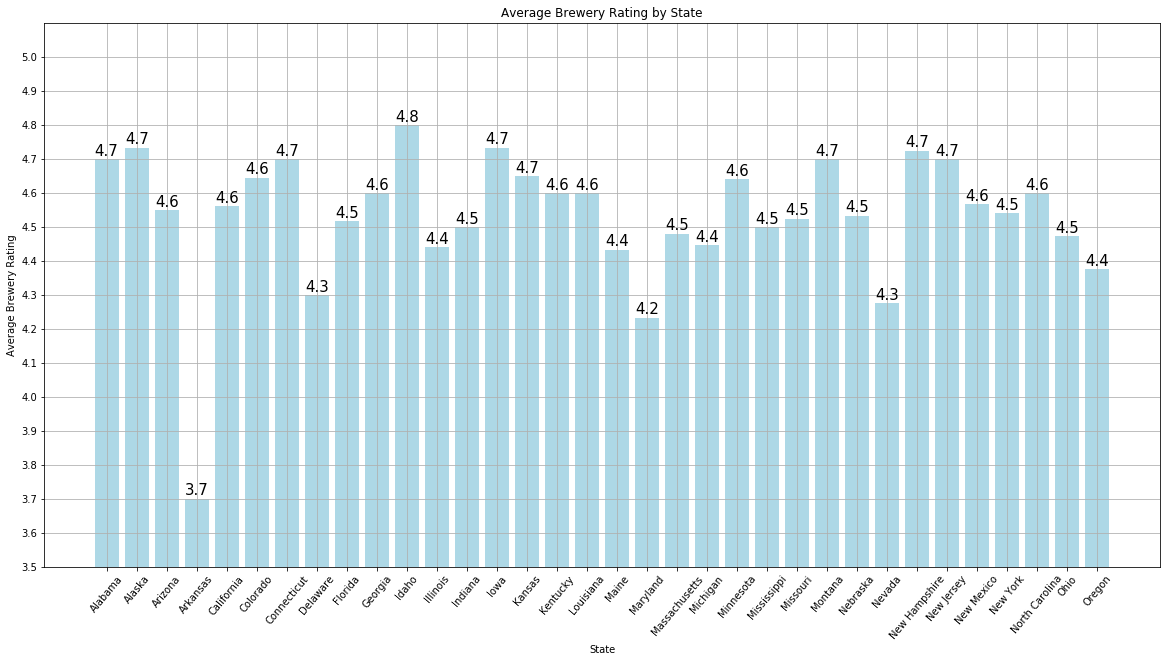

In [420]:
# Group DataFrame by State
group_by_state = dataset_clean2.groupby('state')
means = group_by_state['rating'].mean().tolist()
rounded_means = [round(means[x],1) for x in range(len(means))]

#Plot Average Rating By State
plt.figure(figsize = (20,10))
plt.bar(np.arange(0,len(group_by_state),1),height = group_by_state['rating'].mean(), color = 'lightblue', align = 'center', tick_label = group_by_state['rating'].mean().index, width = 0.8,)
plt.grid()
plt.title("Average Brewery Rating by State")
plt.xlabel("State")
plt.ylabel("Average Brewery Rating")
plt.xticks(rotation = 50)
plt.yticks(np.arange(3.5,5.1,0.1))
plt.ylim(3.5,5.1)
[plt.annotate(rounded_means[x],[x-.4,group_by_state['rating'].mean()[x]+0.01], color = 'black', fontsize=15) for x in range(len(group_by_state['rating'].mean()))]
plt.savefig("Average Brewery Rating by State")



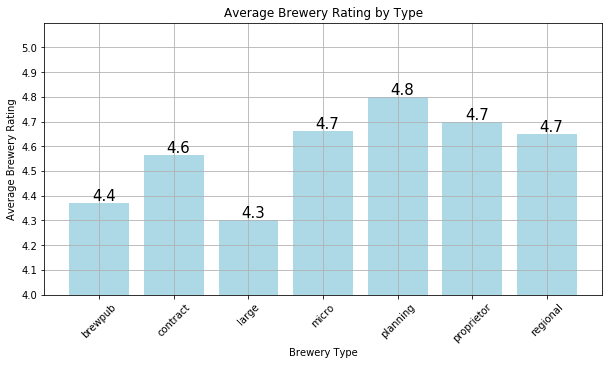

In [421]:
# Group DataFrame by Brewery Type
group_by_type = dataset_clean2.groupby('brewery_type')
means = group_by_type['rating'].mean().tolist()
rounded_means = [round(means[x],1) for x in range(len(means))]

#Plot Average Rating By Brewery Type
plt.figure(figsize = (10,5))
plt.bar(np.arange(0,len(group_by_type),1),height = group_by_type['rating'].mean(), color = 'lightblue', align = 'center', tick_label = group_by_type['rating'].mean().index, width = 0.8,)
plt.grid()
plt.title("Average Brewery Rating by Type")
plt.xlabel("Brewery Type")
plt.ylabel("Average Brewery Rating")
plt.xticks(rotation = 45)
plt.yticks(np.arange(4,5.1,0.1))
plt.ylim(4,5.1)
[plt.annotate(rounded_means[x],[x - 0.1, group_by_type['rating'].mean()[x]+0.01], color = 'black', fontsize=15) for x in range(len(group_by_type['rating'].mean()))]
plt.savefig("Average Brewery Rating by Type")


In [424]:
# # Group DataFrame by Brewery Type
# group_by_type = dataset_clean2.groupby('city')
# means = group_by_type['rating'].mean().tolist()
# rounded_means = [round(means[x],1) for x in range(len(means))]

# #Plot Average Rating By Brewery Type
# plt.figure(figsize = (100,50))
# plt.bar(np.arange(0,len(group_by_type),1),height = group_by_type['rating'].mean(), color = 'lightblue', align = 'center', tick_label = group_by_type['rating'].mean().index, width = 0.8,)
# plt.grid()
# plt.title("Average Brewery Rating by Type")
# plt.xlabel("Brewery Type")
# plt.ylabel("Average Brewery Rating")
# plt.xticks(rotation = 45)
# plt.yticks(np.arange(4,5.1,0.1))
# plt.ylim(4,5.1)
# [plt.annotate(rounded_means[x],[x - 0.1, group_by_type['rating'].mean()[x]+0.01], color = 'black', fontsize=15) for x in range(len(group_by_type['rating'].mean()))]
# plt.savefig("Average Brewery Rating by Type")

dataset_clean2 = dataset_clean2.reset_index()
group_by_type = dataset_clean2[['state','brewery_type','name']].groupby(['state','brewery_type'])
#group_by_type = group_by_type.fillna(0)
breweries_by_type_state = group_by_type.count()

breweries_by_type_state = breweries_by_type_state.rename(columns={'name': "count"}).reset_index()
breweries_by_type_state.pivot_table(index='state',columns="brewery_type", values = "count", fill_value =0,aggfunc='count').unstack()



brewery_type  state         
brewpub       Alabama           0
              Alaska            0
              Arizona           1
              Arkansas          1
              California        1
              Colorado          1
              Connecticut       0
              Delaware          1
              Florida           1
              Georgia           1
              Idaho             0
              Illinois          1
              Indiana           1
              Iowa              0
              Kansas            1
              Kentucky          0
              Louisiana         1
              Maine             1
              Maryland          1
              Massachusetts     1
              Michigan          1
              Minnesota         0
              Mississippi       1
              Missouri          1
              Montana           1
              Nebraska          1
              Nevada            1
              New Hampshire     1
              New J

ValueError: shape mismatch: objects cannot be broadcast to a single shape

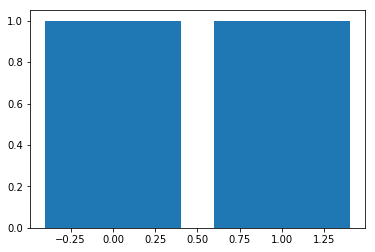

In [425]:
bottom = 0

for x in breweries_by_type_state["brewery_type"].unique():
    y_values = breweries_by_type_state['count'][breweries_by_type_state["brewery_type"] == x]
    plt.bar(np.arange(0,len(breweries_by_type_state['count'][breweries_by_type_state["brewery_type"] == x]),1), label = x, height = y_values, bottom = bottom)
    bottom = bottom + y_values

In [390]:
grp1 = dataset_clean2.groupby(['state','brewery_type'])['name'].count().unstack()

In [391]:

test_df = pd.DataFrame({"state": ["Alabama","Alabama","Alaska","Alaska","Texas","Texas"],
           "brewery_type" : ["micro", "large", "micro", "large", "micro", "large"],
           "count" : [5,1,4,7,9,3]
          })
test_df



,state,brewery_type,count
0,Alabama,micro,5
1,Alabama,large,1
2,Alaska,micro,4
3,Alaska,large,7
4,Texas,micro,9
5,Texas,large,3


In [395]:
#test_df[['state','brewery_type']].plot(kind='bar', stacked=True)

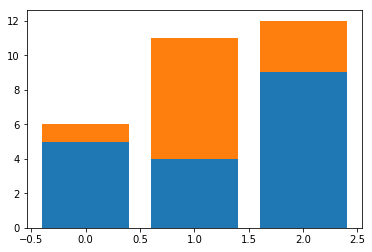

In [413]:

#[plt.bar(np.arange(0,len(test_df['count'][test_df["brewery_type"] == x]),1), label = x, height = test_df['count'][test_df["brewery_type"] == x], bottom = test_df['count'][test_df["brewery_type"] == "micro"]) for x in test_df["brewery_type"].unique()]
bottom = 0

for x in test_df["brewery_type"].unique():
    y_values = test_df['count'][test_df["brewery_type"] == x]
    plt.bar(np.arange(0,len(test_df['count'][test_df["brewery_type"] == x]),1), label = x, height = y_values, bottom = bottom)
    bottom = bottom + y_values

# plt.bar(np.arange(0,len(test_df['count'][test_df["brewery_type"] == "micro"]),1), label = "micro", height = test_df['count'][test_df["brewery_type"] == "micro"])
# plt.bar(np.arange(0,len(test_df['count'][test_df["brewery_type"] == "large"]),1), label = "large", height = test_df['count'][test_df["brewery_type"] == "large"], bottom=test_df['count'][test_df["brewery_type"] == "micro"])
# plt.xticks()
# plt.legend()







#plt.xticks(np.arange(0,len(test_df['count']),1), labels = list(test_df["state"]))
#[plt.bar(np.arange(0,len(breweries_by_type_state['count'][breweries_by_type_state["brewery_type"] == x]),1), height = breweries_by_type_state['count'][breweries_by_type_state["brewery_type"] == "micro"]) for x in breweries_by_type_state["brewery_type"].unique()]
# plt.ylim(0,15)


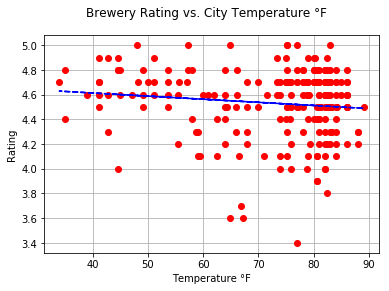

The slope of the line of best fit is -0.0025222526583749227
The correlation coefficient is -0.12028972803458614


KeyError: 'Average Yearly Temp'

In [405]:
#Making Line of Best Fit for City Temp
(slope, intercept, _, _, _) = linregress(dataset_clean2['temp'], dataset_clean2['rating'])
fit = slope * dataset_clean2['temp'] + intercept

#Making plot
fig, ax = plt.subplots()
fig.suptitle("Brewery Rating vs. City Temperature °F", fontsize=12)

ax.set_xlabel("Temperature °F")
ax.set_ylabel("Rating")
corr_coef = np.corrcoef(dataset_clean2['temp'], dataset_clean2['rating'])[0, 1]
ax.plot(dataset_clean2['temp'], dataset_clean2['rating'], color = 'red', linewidth=0, marker='o')
ax.plot(dataset_clean2['temp'], fit, 'b--')
plt.grid()
plt.show()

print('The slope of the line of best fit is ' + str(slope))
print(f'The correlation coefficient is {corr_coef}')



#Making Line of Best Fit for State Temp
(slope2, intercept2, _, _, _) = linregress(dataset_clean2['Average Yearly Temp'], 
                                         dataset_clean2['rating'])
fit2 = slope2 * dataset_clean2['Average Yearly Temp'] + intercept2

#Making plot
fig2, ax2 = plt.subplots()
fig2.suptitle("Brewery Rating vs. State Temperature °F", fontsize=12)

ax2.set_xlabel("Temperature °F")
ax2.set_ylabel("Rating")
corr_coef2 = np.corrcoef(dataset_clean2['Average Yearly Temp'], dataset_clean2['rating'])[0, 1]
ax2.plot(dataset_clean2['Average Yearly Temp'], dataset_clean2['rating'], 
        color = 'red', linewidth=0, marker='o')
ax2.plot(dataset_clean2['temp'], fit, 'b--')
plt.grid()
plt.show()

print('The slope of the line of best fit is ' + str(slope2))
print(f'The correlation coefficient is {corr_coef2}')
